In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools as it
import sys
import progressbar

folder = "data_traj_U/"

In [2]:
!ls $folder

dat_N_15_NL_2_0.txt   dat_N_23_NL_2_12.txt  dat_N_31_NL_1_16.txt
dat_N_15_NL_2_1.txt   dat_N_23_NL_2_13.txt  dat_N_31_NL_1_17.txt
dat_N_15_NL_2_10.txt  dat_N_23_NL_2_14.txt  dat_N_31_NL_1_18.txt
dat_N_15_NL_2_11.txt  dat_N_23_NL_2_15.txt  dat_N_31_NL_1_19.txt
dat_N_15_NL_2_12.txt  dat_N_23_NL_2_16.txt  dat_N_31_NL_1_2.txt
dat_N_15_NL_2_13.txt  dat_N_23_NL_2_17.txt  dat_N_31_NL_1_20.txt
dat_N_15_NL_2_14.txt  dat_N_23_NL_2_18.txt  dat_N_31_NL_1_21.txt
dat_N_15_NL_2_15.txt  dat_N_23_NL_2_19.txt  dat_N_31_NL_1_22.txt
dat_N_15_NL_2_16.txt  dat_N_23_NL_2_2.txt   dat_N_31_NL_1_23.txt
dat_N_15_NL_2_17.txt  dat_N_23_NL_2_20.txt  dat_N_31_NL_1_24.txt
dat_N_15_NL_2_18.txt  dat_N_23_NL_2_21.txt  dat_N_31_NL_1_25.txt
dat_N_15_NL_2_19.txt  dat_N_23_NL_2_22.txt  dat_N_31_NL_1_26.txt
dat_N_15_NL_2_2.txt   dat_N_23_NL_2_23.txt  dat_N_31_NL_1_27.txt
dat_N_15_NL_2_20.txt  dat_N_23_NL_2_24.txt  dat_N_31_NL_1_28.txt
dat_N_15_NL_2_21.txt  dat_N_23_NL_2_25.txt  dat_N_31_NL_1_29.txt
dat_N_15_NL_2_22.txt  dat_

In [10]:
v_N = np.array([15,17,19,21,23,25,27,29,31,41])
L = 2
N_sample = 112
N_collect = 100

prefix = "dat"
suffix = ".txt"

In [11]:
N_N = v_N.size
full_data = np.zeros((N_N,N_collect+1,3,N_sample))

# the loop with progress bar
bar = progressbar.ProgressBar(maxval=N_N*N_collect, \
widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

count = 0
bar.start()   


for i_N in range(N_N):
    N_spin = v_N[i_N]
    i_select = [(N_spin+1)//4, (N_spin+1)//2, 3*(N_spin+1)//4]
    
    for i in range(N_collect):
        fn = folder + prefix + "_N_" + str(N_spin) + "_NL_" + str(L) + "_" + str(i) + suffix
        data = np.loadtxt(fn).T

        full_data[i_N,i+1,:,:] = data[i_select,:N_sample]

        count += 1
        bar.update(count)
bar.finish()
    
outfile = folder + "save" + "_NL_" + str(L) + "_Ns_" + str(N_sample)
np.save(outfile, full_data)

[========================================================================] 100%


In [12]:
file = folder + "save" + "_NL_" + str(L) + "_Ns_" + str(N_sample) + ".npy"
full_data = np.load(file)

mean_S = np.mean(full_data,axis=3)
err_S = np.std(full_data,axis=3)/np.sqrt(N_sample)

Text(0, 0.5, '$S_t$')

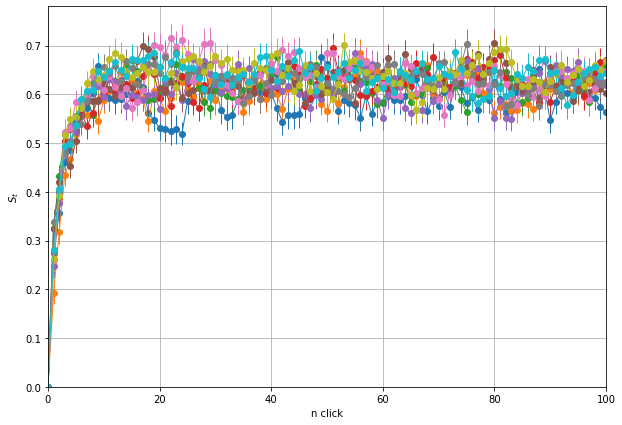

In [13]:
plt.figure(figsize=(10,7))

x_axis = np.linspace(0,N_collect,N_collect+1)

for i_N in range(N_N):
    _ = plt.errorbar(x_axis,mean_S[i_N,:,1], yerr=err_S[i_N,:,1], linewidth = 1, marker="o")

plt.xlim(0,N_collect)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("n click")
plt.ylabel(r"$S_t$")

#plt.savefig("St_" + str(N_spin) + "_site_" + str(i_site) + ".png")

In [15]:
mean_S.shape

(10, 101, 3)

Text(0, 0.5, '$S_l$')

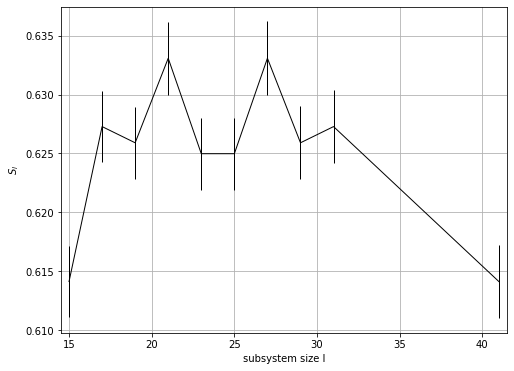

In [25]:
plt.figure(figsize=(8,6))

i_conv = 20
i_plot = 1

x_axis = v_N


dat = np.mean(mean_S[:,i_conv:,i_plot],axis=1)
err = np.sqrt(np.mean(err_S[:,i_conv:,i_plot]**2,axis=1))/np.sqrt(N_collect-i_conv)
_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err, linewidth = 1, color = 'black')
#_ = plt.errorbar(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(14.5,41.5)

plt.grid(True)

plt.xlabel("subsystem size l")
plt.ylabel(r"$S_l$")

In [18]:
0.5*(dat+np.flip(dat))

array([0.6156736 , 0.6277609 , 0.62732663, 0.63176147, 0.62469643,
       0.62469643, 0.63176147, 0.62732663, 0.6277609 , 0.6156736 ])

In [26]:
err

array([0.00299607, 0.00301953, 0.00307538, 0.00311651, 0.00306334,
       0.00304509, 0.00312283, 0.00309849, 0.00312724, 0.00309101])